#1. Loading Data and Pre-processing

In [1]:
import csv

In [2]:
WeatherData= "/content/MinimumWage.csv"

In [3]:
with open(WeatherData) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter = ",")
  line_count = 0
  Data = []
  for row in csv_reader:
    if line_count ==0:
      Header=row
    else:
      Data.append(row)
    line_count = line_count + 1


In [4]:
#print(Header)

In [5]:
Data_dict={}
for name in Header:
  Data_dict[name]=[]

print(Data_dict)

{'Year': [], 'FederalMinimumWage': [], 'MeanAnnualInflation': [], 'MinWageIndexedLastRaiseYear': [], 'UnemploymentRateDecember': [], 'GDP_AnnualGrowth': []}


In [6]:
for i in Data:
  idx=0
  for j in Header:
    if j =="Year":
      Data_dict[j].append(i[idx])
    elif j=="FederalMinimumWage" or j=="MeanAnnualInflation" or j=="UnemploymentRateDecember" or j=="GDP_AnnualGrowth":
      Data_dict[j].append(float(i[idx].strip("$").strip("%")))
    else:
      Data_dict[j].append(None)
    idx=idx+1


In [7]:
Data_dict["Bin"]=[]

In [8]:
for i in Data_dict['GDP_AnnualGrowth']:
  if float(i) > -15 and float(i) <= 0:
    Data_dict['Bin'].append("0")
  elif float(i) > 0 and float(i) < 10:
    Data_dict['Bin'].append("1")
  else:
    Data_dict['Bin'].append("2")
  

In [9]:
print(Data_dict)

{'Year': ['1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], 'FederalMinimumWage': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.15, 1.15, 1.25, 1.25, 1.25, 1.25, 1.4, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 2.0, 

#2. Raw Plots

In [10]:
from matplotlib import pyplot as plt

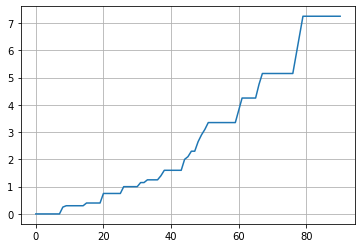

In [11]:
plt.plot(Data_dict["FederalMinimumWage"])
plt.grid()

<BarContainer object of 91 artists>

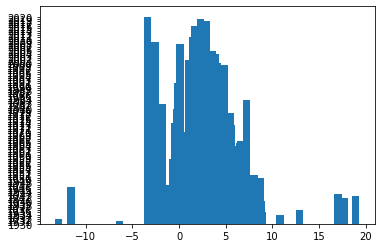

In [12]:
plt.bar(Data_dict["GDP_AnnualGrowth"],Data_dict["Year"])


#3. Compute Statistics based on aggregated data

the latest year in each bin(most recent)(sort the year),
avg of unemployment each bin,
count of record in each bin,

I created 3 bins : 0,1,2 and that the conditions are if GDP Annual Growth is more than -15% and and less than or equals to 0, put in bin 0, if GDP Annual Growth is more than 0 and less than 10%, put in bin 1 and everything else, put in bin 2

In [13]:
sortedYear={}
for i in [0,1,2]:
  sortedYear[i]=[]

In [14]:
sortedUnemploy={}
for i in [0,1,2]:
  sortedUnemploy[i]=[]

In [15]:
idx = 0
for i in Data_dict["Bin"]:
  if i =="0":
    sortedYear[0].append(Data_dict["Year"][idx])
  elif i =="1":
    sortedYear[1].append(Data_dict["Year"][idx])
  else:
    sortedYear[2].append(Data_dict["Year"][idx])
  idx = idx +1


In [16]:
index = 0
for i in Data_dict["Bin"]:
  if i =="0":
    sortedUnemploy[0].append(Data_dict["UnemploymentRateDecember"][index])
  elif i =="1":
    sortedUnemploy[1].append(Data_dict["UnemploymentRateDecember"][index])
  else:
    sortedUnemploy[2].append(Data_dict["UnemploymentRateDecember"][index])
  index = index +1

In [17]:
#latest year in bin 0 and count of record in bin 0 and avg unemployment
print("Latest year is",max(sortedYear[0]))
print("There are",len(sortedYear[0]),"records in bin 0")
print ("Avg unemployment rate is",sum(sortedUnemploy[0])/len(sortedUnemploy[0]))

Latest year is 2020
There are 18 records in bin 0
Avg unemployment rate is 9.81111111111111


In [18]:
#latest year in bin 1
print("Latest year is",max(sortedYear[1]))
print("There are",len(sortedYear[1]),"records in bin 1")
print ("Avg unemployment rate is",sum(sortedUnemploy[1])/len(sortedUnemploy[1]))

Latest year is 2019
There are 68 records in bin 1
Avg unemployment rate is 6.057352941176469


In [19]:
#latest year in bin 2
print("Latest year is",max(sortedYear[2]))
print("There are",len(sortedYear[2]),"records in bin 2")
print ("Avg unemployment rate is",sum(sortedUnemploy[2])/len(sortedUnemploy[2]))

Latest year is 1943
There are 5 records in bin 2
Avg unemployment rate is 11.02


In [43]:
aveunemploybin2 = sum(sortedUnemploy[2])/len(sortedUnemploy[2])
aveunemploybin1 = sum(sortedUnemploy[1])/len(sortedUnemploy[1])
aveunemploybin0 = sum(sortedUnemploy[0])/len(sortedUnemploy[0])

In [51]:
count0= len(sortedYear[0])
count1= len(sortedYear[1])
count2= len(sortedYear[2])

#Summary Plot

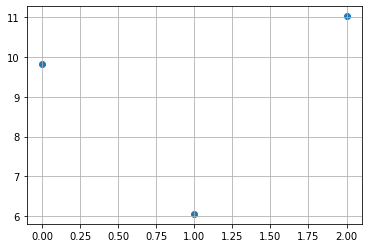

In [49]:
plt.scatter([0,1,2],[aveunemploybin0,aveunemploybin1,aveunemploybin2])
plt.grid()

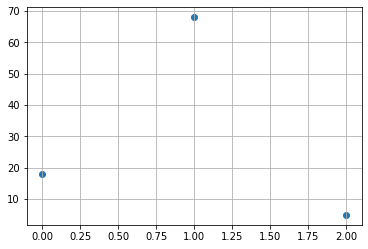

In [54]:
plt.scatter([0,1,2],[count0,count1,count2])
plt.grid()

#Compute with Pandas

In [20]:
import numpy as np
import pandas as pd

In [21]:
DF=pd.DataFrame(Data_dict)

In [22]:
DF

,Year,FederalMinimumWage,MeanAnnualInflation,MinWageIndexedLastRaiseYear,UnemploymentRateDecember,GDP_AnnualGrowth,Bin
0,1930,0.00,-2.3,None,8.7,-8.5,0
1,1931,0.00,-9.0,None,15.9,-6.4,0
2,1932,0.00,-9.9,None,23.6,-12.9,0
3,1933,0.00,-5.1,None,24.9,-1.2,0
4,1934,0.00,3.1,None,21.7,10.8,2
...,...,...,...,...,...,...,...
86,2016,7.25,1.3,None,4.7,1.7,1
87,2017,7.25,2.1,None,4.1,2.3,1
88,2018,7.25,2.4,None,3.9,2.9,1
89,2019,7.25,1.8,None,3.6,2.3,1


In [23]:
DF.groupby("Bin")["UnemploymentRateDecember"].mean().round(2)

Bin
0     9.81
1     6.06
2    11.02
Name: UnemploymentRateDecember, dtype: float64

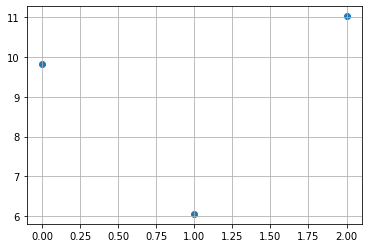

In [47]:
plt.scatter([0,1,2],[aveunemploybin0,aveunemploybin1,aveunemploybin2])
plt.grid()

The plot matches the unemployment rate I calculated with pandas.

In [24]:
DF.groupby("Bin")["UnemploymentRateDecember"].count()

Bin
0    18
1    68
2     5
Name: UnemploymentRateDecember, dtype: int64

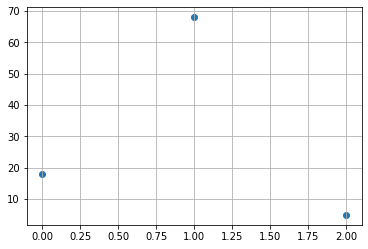

In [55]:
plt.scatter([0,1,2],[count0,count1,count2])
plt.grid()

The plot matches the count of records in each bin through pandas

In [25]:
DF.groupby("Bin")["Year"].max()

Bin
0    2020
1    2019
2    1943
Name: Year, dtype: object